# Tracking de microbilles et calcul de la matrice des déformation

## Imports

In [1]:
from microbeadsTracking import Debit, Image, Movie, cisaillement
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
np.set_printoptions(precision=3, suppress=True)

## Variables globales

In [2]:
Debit._debits = ['150a']
Debit._lastPics = [42]
Debit._nbilles = [250]
Debit._steps = [2]
Debit._droites = [[(384,421,630, 630)]]

## Repérage de la forme de la goutte

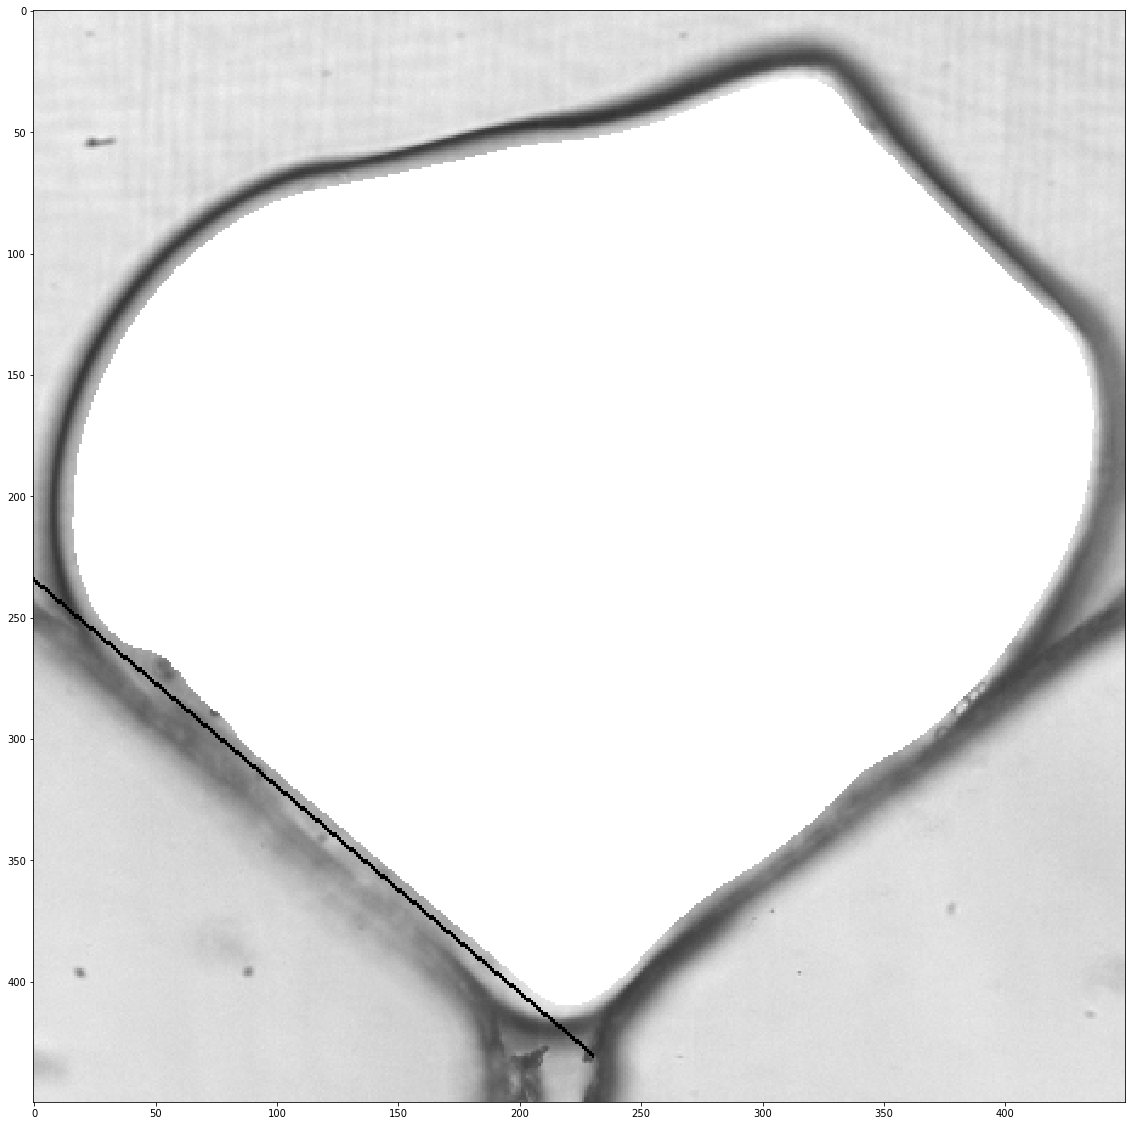

In [3]:
image = Image(0, 40)
image.initGoutte()
image.initBW()
for x in range(1024):
    for y in range(1024):
        if image.goutte[y, x]:
            image.numpyBW[y,x] = 255

image.show(im = 'BW')

## Repérage des billes

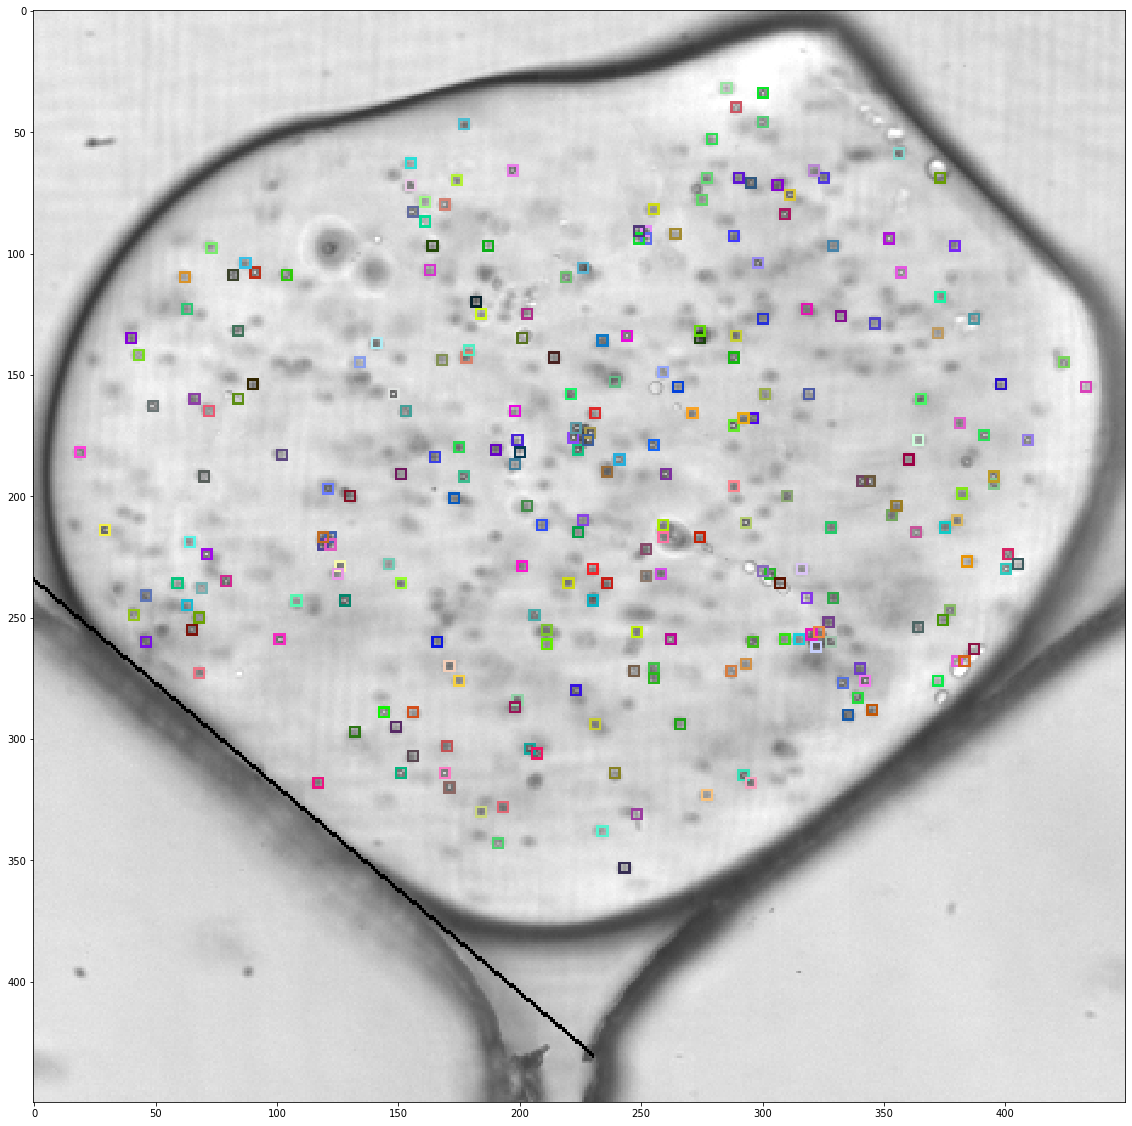

In [4]:
image = Image(0, 10)
image.initGoutte()
image.reperageBilles()
image.initRGB()
for bille in image.billes:
    image.afficheBille(bille[0], bille[1])

image.show(im = 'RGB')

## Calcul des trajectoires

In [5]:
mov = Movie(0)
mov.calculTrajectoires()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [6]:
print("Nombre de billes valides après le calcul des trajectoires :", np.count_nonzero(mov._billesValides))
mov.suppressionTaches()
print("Nombre de billes valides après suppression des tâches :", np.count_nonzero(mov.billesValides))

Nombre de billes valides après le calcul des trajectoires : 196
Nombre de billes valides après suppression des tâches : 190


In [7]:
Movie.affinerTrajectoires(mov)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [8]:
print("Nombre de billes valides après affinement :", np.count_nonzero(mov.billesValides2))

Nombre de billes valides après affinement : 167


## Calcul de la matrice des déformations

In [9]:
Movie.calculPlusProchesVoisins(mov, v='2')
Movie.calculMatriceDeformation(mov, v='2', nvoisins=10)

## Trajectoires

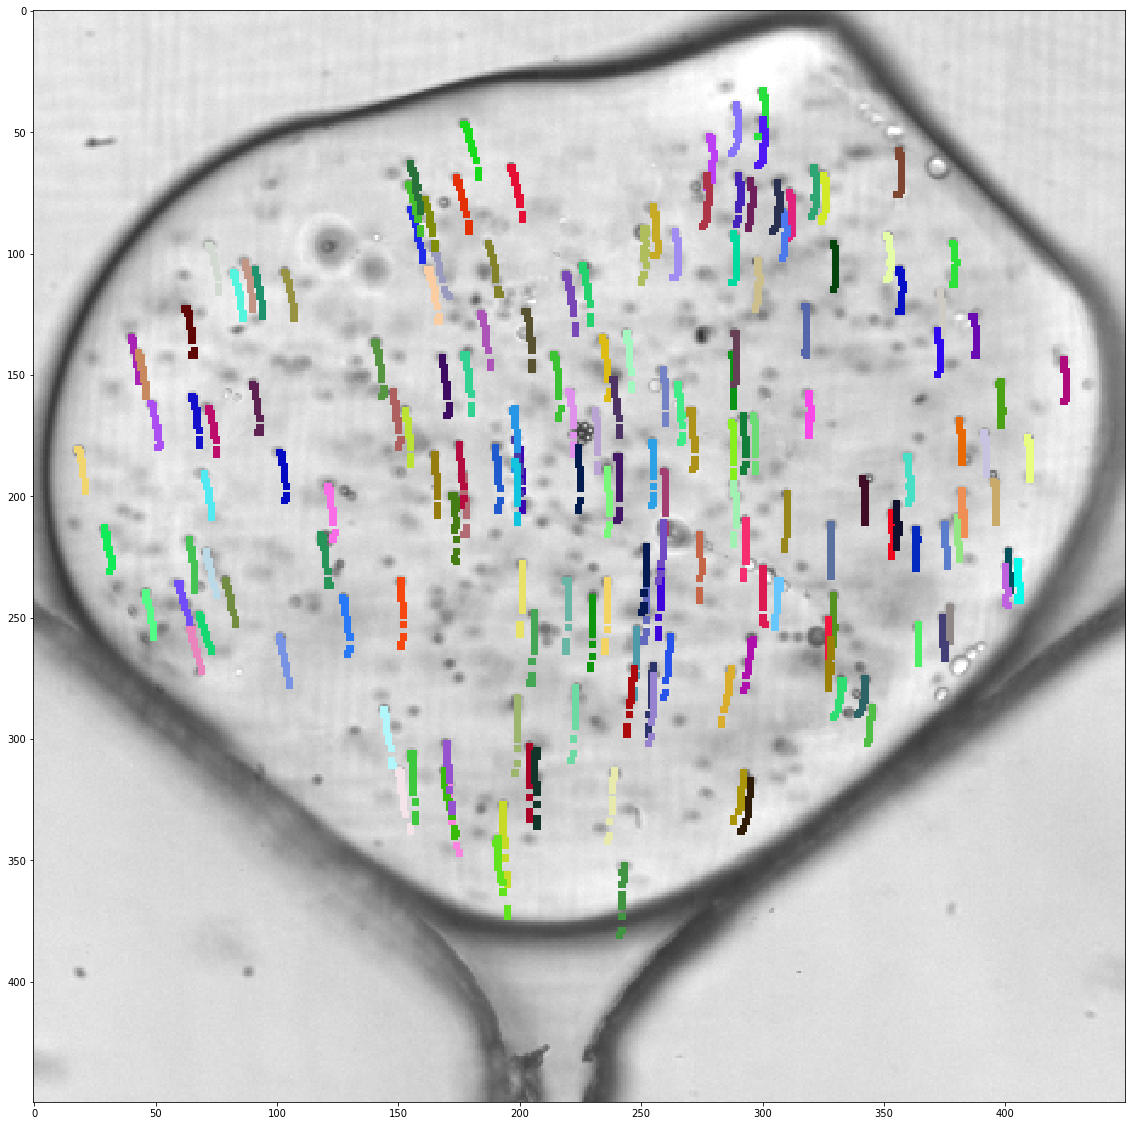

In [10]:
Movie.showTrajectoires(mov, v='2', enVert=[], random=True)

## Compression
### Déterminant de la matrice des déformations

Triangulation terminée


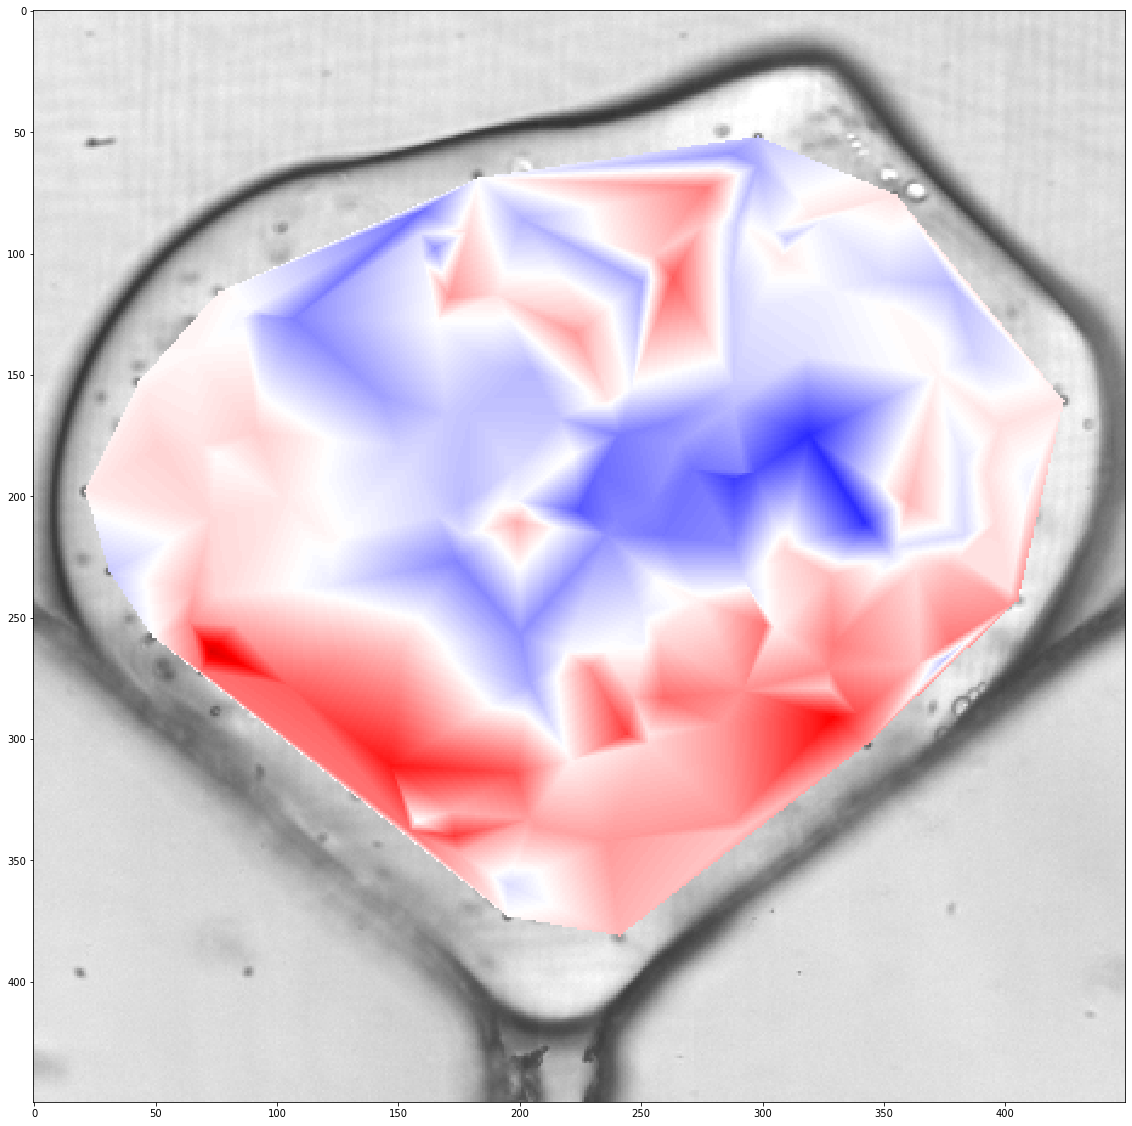

In [11]:
mov.cnorm = colors.Normalize(vmin=0.8, vmax=1.2, clip=True)
mov.cmap = cm.get_cmap(name='seismic_r')
Movie.showCompression(mov, 40, v='2')

### Cisaillement

Triangulation terminée


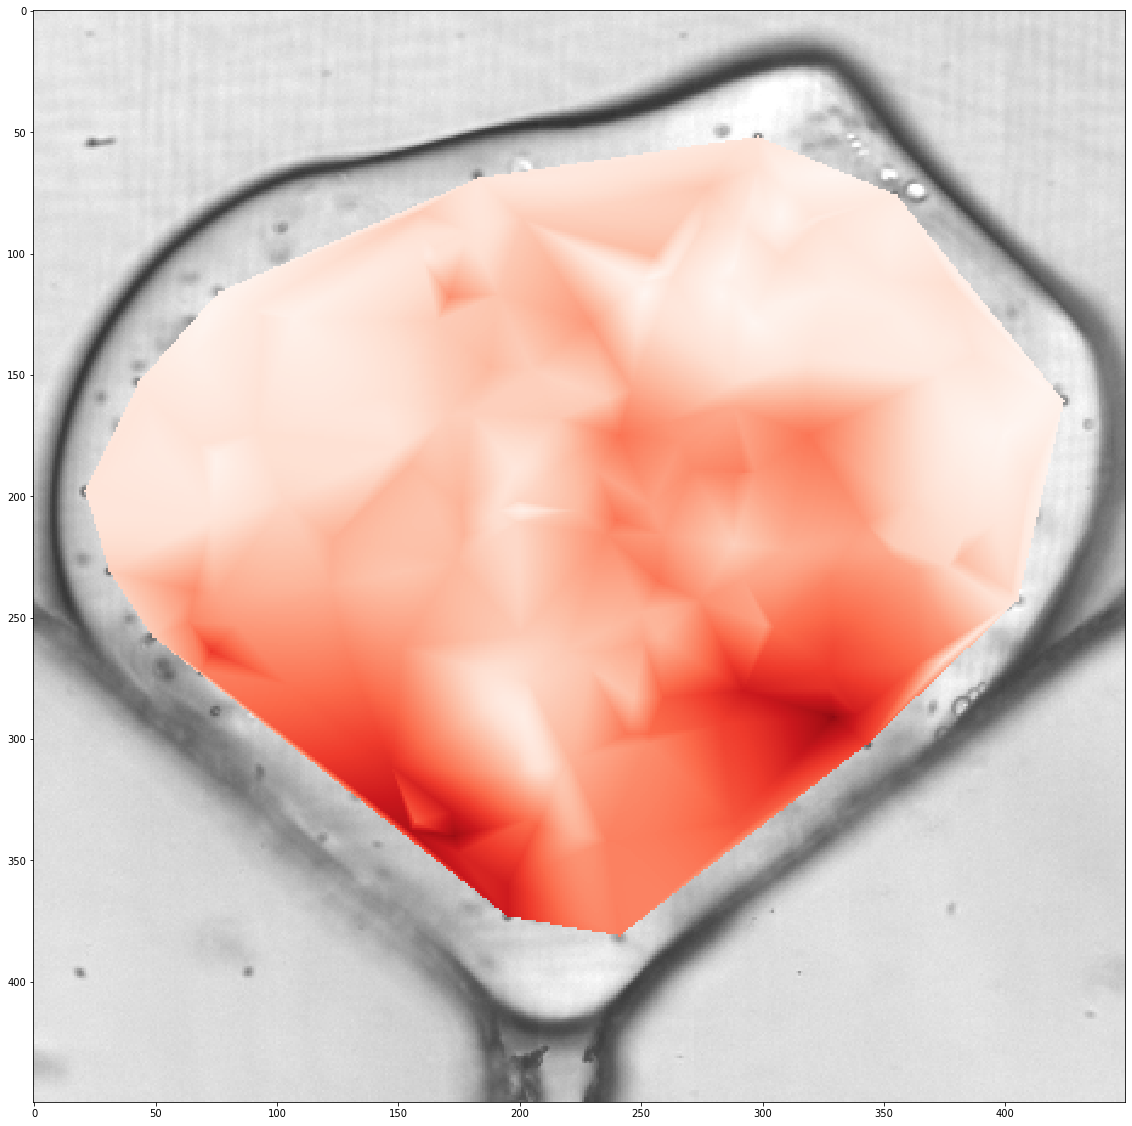

In [12]:
mov.cnorm = colors.Normalize(vmin=0, vmax=0.3, clip=True)
mov.cmap = cm.get_cmap(name='Reds')
Movie.showCompression(mov, 40, v='2', indic='cis')

### Enregistrement des images générées

In [13]:
# plt.imshow(mov._image.numpyRGB[ymin:ymax, xmin:xmax])
# plt.colorbar(cm.ScalarMappable(norm=mov.cnorm, cmap=mov.cmap))
# plt.savefig('out.jpg')
# plt.show()

## Graphiques

[]

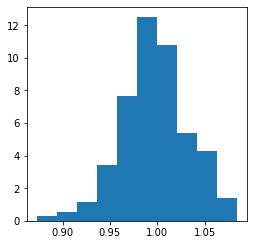

In [19]:
plt.rcParams['figure.figsize'] = [10/2.54, 10/2.54]
plt.hist(mov.detJ[np.where(mov.billesValides2)], density=True)
plt.plot()

[]

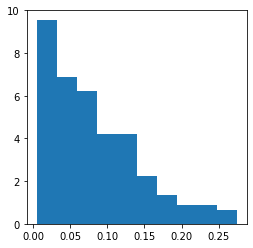

In [20]:
plt.hist(cisaillement(mov.J[np.where(mov.billesValides2)]), density=True)
plt.plot()

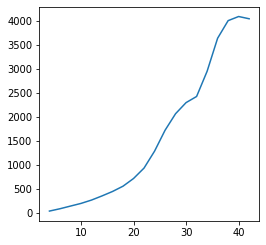

In [21]:
Movie.showSumOfDistances(mov)

## Visualisation de trajectoires particulières

In [17]:
print(mov.billesValides2)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True False  True False False  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True False False False False
  True  True  True  True  True False False  True False  True  True  True
  True  True False False False False False  True  True  True False  True
  True  True  True False  True  True False  True  True  True  True False
 False  True False False  True  True False False  True  True  True  True
  True  True  True  True  True  True  True False  T

2


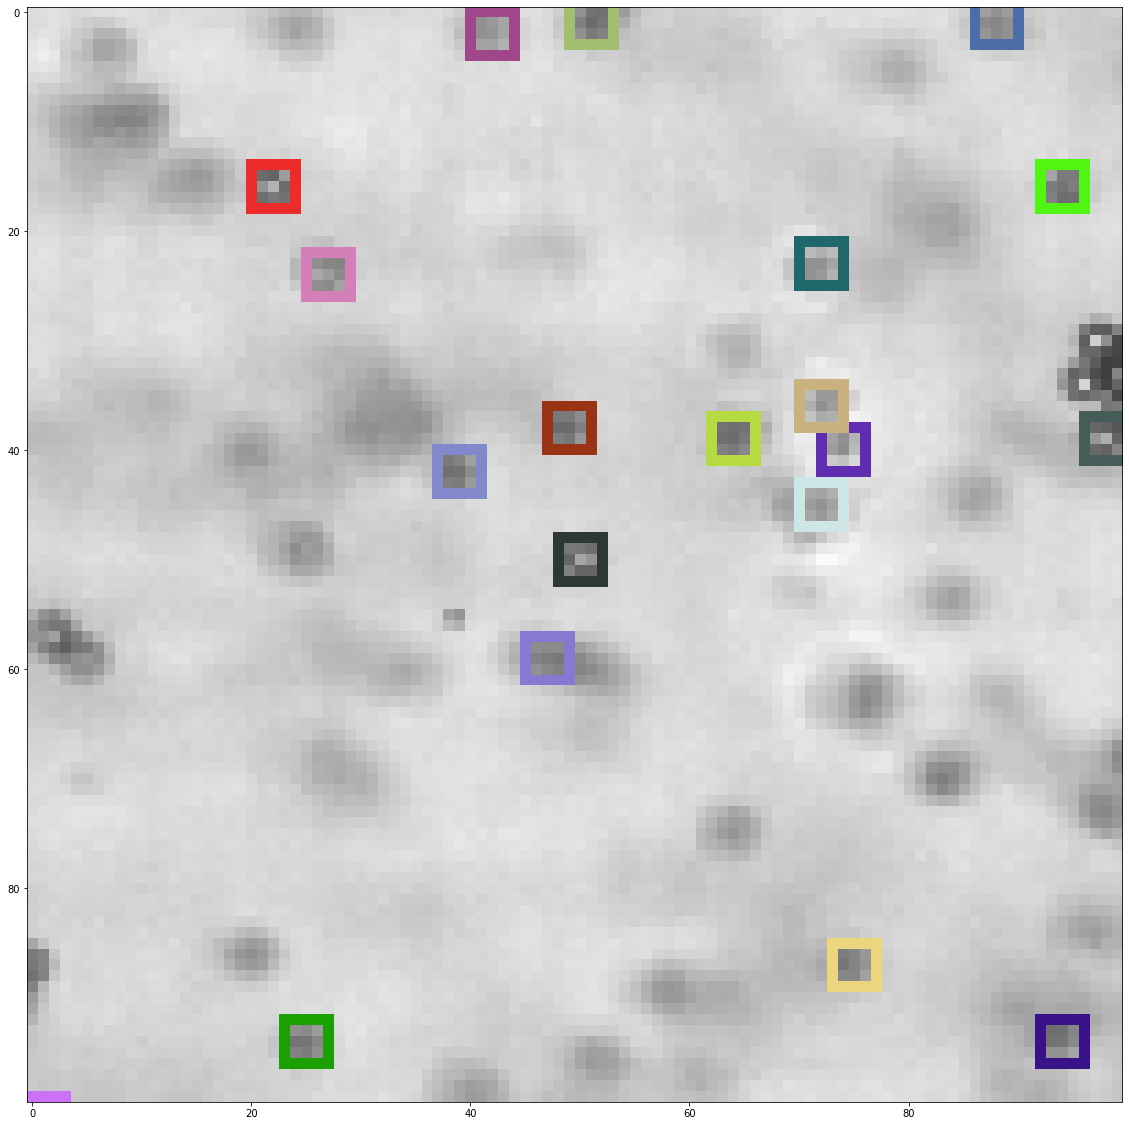

22


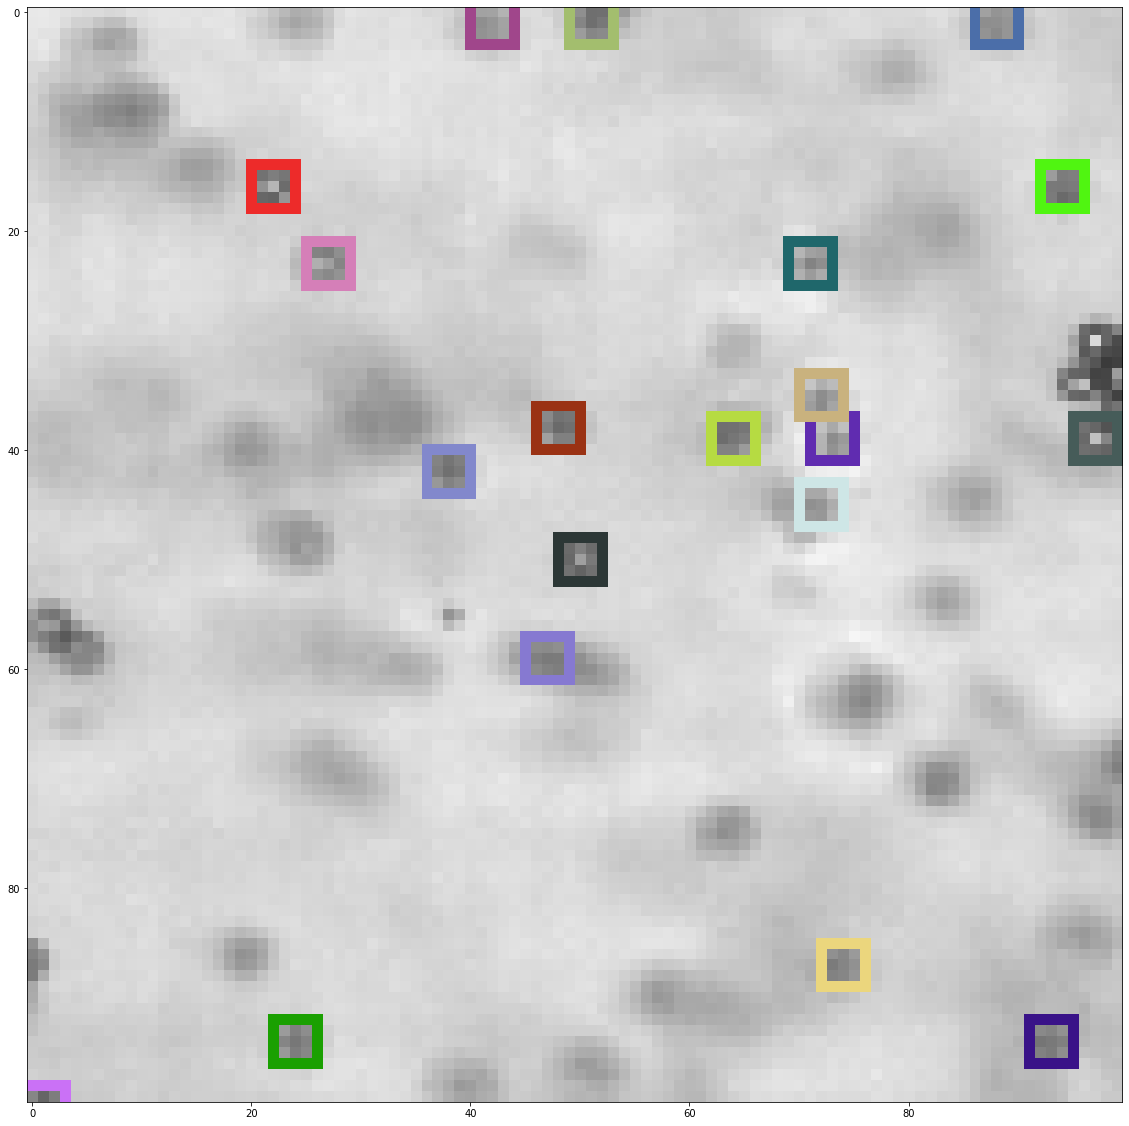

42


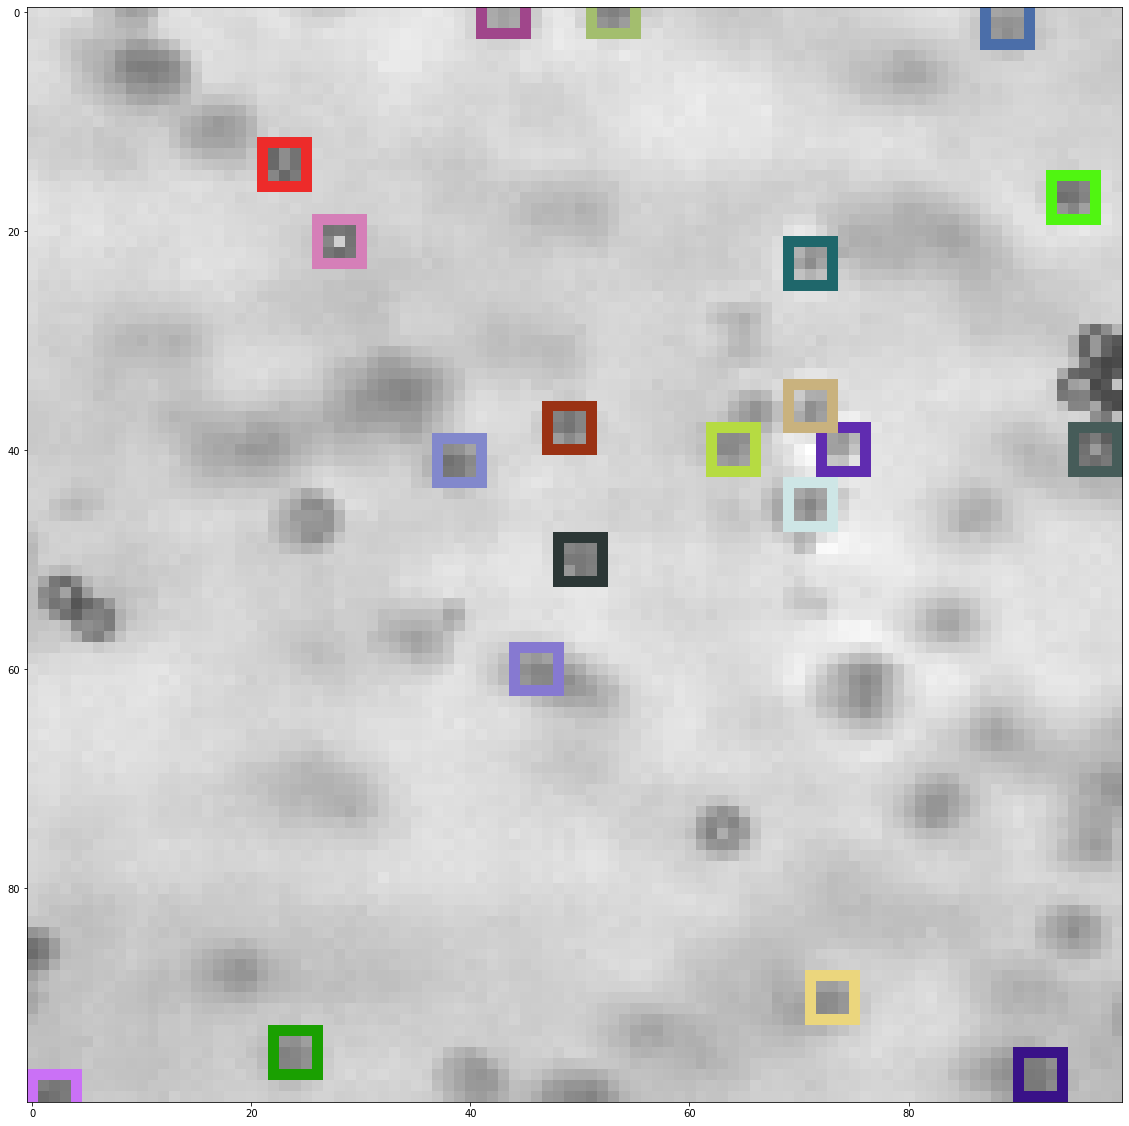

In [22]:
Movie.showTrajectoire(mov, 1, nvoisins='all', start='min', stop='max', s=10, static=False, v='2')